In [1]:
import numpy as np
import scipy.sparse as sp
from matplotlib import pyplot as plt


In [2]:
MOVE = {'U': lambda p: (p[0], p[1] - 1),
        'D': lambda p: (p[0], p[1] + 1),
        'L': lambda p: (p[0] - 1, p[1]),
        'R': lambda p: (p[0] + 1, p[1])}
ORIENT = {'U': 'LR',
          'D': 'RL',
          'L': 'DU',
          'R': 'UD'}

with open('11.txt', 'r') as file:
    data = [int(s) for s in file.read().split(',')]


In [3]:
class Halt(Exception):
    pass


class Yield(Exception):
    pass


class VM:
    def __init__(self, memory, inputs, outputs):
        self.ops = {1: self.add, 
                    2: self.mul, 
                    3: self.input_, 
                    4: self.output, 
                    5: self.jnz,
                    6: self.jz,
                    7: self.lt,
                    8: self.eq,
                    9: self.rbo,
                    99: self.hcf}
        self.memory = memory
        self.pointer = 0
        self.base = 0
        self.inputs = inputs
        self.outputs = outputs

    def run(self):
        while self.step():
            pass
        
    def step(self):
        try:
            while True:
                self.ops[self.read(self.pointer) % 100]()
        except Yield:
            return True
        except Halt:
            return False

    def add(self):
        a, b, c = self.decode(3)
        self.write(c, self.read(a) + self.read(b))

    def mul(self):
        a, b, c = self.decode(3)
        self.write(c, self.read(a) * self.read(b))

    def input_(self):
        a, = self.decode(1)
        self.write(a, self.inputs.pop(0))

    def output(self):
        a, = self.decode(1)
        self.outputs.append(self.read(a))
        raise Yield()

    def jnz(self):
        a, b = self.decode(2)
        if self.read(a) != 0:
            self.pointer = self.read(b)

    def jz(self):
        a, b = self.decode(2)
        if self.read(a) == 0:
            self.pointer = self.read(b)

    def lt(self):
        a, b, c = self.decode(3)
        self.write(c, 1 if self.read(a) < self.read(b) else 0)

    def eq(self):
        a, b, c = self.decode(3)
        self.write(c, 1 if self.read(a) == self.read(b) else 0)
        
    def rbo(self):
        a, = self.decode(1)
        self.base += self.read(a)

    def hcf(self):
        raise Halt()

    def decode(self, count):
        mode = self.read(self.pointer) // 100
        self.pointer += 1

        params = []
        for i in range(count):
            value = self.pointer
            if mode % 10 == 0:
                value = self.read(value)
            elif mode % 10 == 2:
                value = self.base + self.read(value)
            params.append(value)
            self.pointer += 1
            mode //= 10
        return params
    
    def read(self, offset):
        self.extend(offset)
        return self.memory[offset]
    
    def write(self, offset, value):
        self.extend(offset)
        self.memory[offset] = value
    
    def extend(self, offset):
        if offset >= len(self.memory):
            self.memory.extend([0] * (offset - len(self.memory) + 1))


## Part 1

In [4]:
inputs = [0]
outputs = []
vm = VM(data.copy(), inputs, outputs)

grid = {}
pos = (0, 0)
orient = 'U'

while vm.step() and vm.step():
    grid[pos] = outputs.pop(0)
    orient = ORIENT[orient][outputs.pop(0)]
    pos = MOVE[orient](pos)
    inputs.append(grid.get(pos, 0))

len(grid)


2082

## Part 2

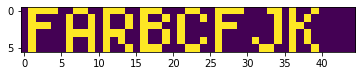

In [6]:
inputs = [1]
outputs = []
vm = VM(data.copy(), inputs, outputs)

grid = np.zeros([45, 6], dtype=np.int32)
pos = (0, 0)
orient = 'U'

while vm.step() and vm.step():
    grid[pos] = outputs.pop(0)
    orient = ORIENT[orient][outputs.pop(0)]
    pos = MOVE[orient](pos)
    inputs.append(grid[pos])

plt.imshow(grid.T)
